# Importing Data and required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np

In [2]:
file_path = 'train.csv' 
df_train = pd.read_csv(file_path)

In [3]:
file_path = 'test.csv' 
df_test = pd.read_csv(file_path)

# Preprocessing Data

Encoding 

In [4]:
encoded_df_train = pd.get_dummies(df_train, columns=['MSSubClass', 'MSZoning', 'Street', 'Alley',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2',  'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
     'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']) 
for i in encoded_df_train.columns:
    print(i)
encoded_df_train.to_csv('encoded_train_file.csv', index=False)
encoded_df_train.head()

Id
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
MSSubClass_20
MSSubClass_30
MSSubClass_40
MSSubClass_45
MSSubClass_50
MSSubClass_60
MSSubClass_70
MSSubClass_75
MSSubClass_80
MSSubClass_85
MSSubClass_90
MSSubClass_120
MSSubClass_160
MSSubClass_180
MSSubClass_190
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
Alley_Grvl
Alley_Pave
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
Utilities_NoSeWa
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborh

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [5]:
column_means = encoded_df_train.mean()
filled_encoded_df_train = encoded_df_train.fillna(column_means)
print("Missing values after filling:")
print(filled_encoded_df_train.isnull().sum())
filled_encoded_df_train.to_csv('filled_encoded_train_file.csv', index=False)

Missing values after filling:
Id                       0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 304, dtype: int64


Corellation visualization

In [6]:
correlation_matrix = filled_encoded_df_train.corr()

correlation_with_target = correlation_matrix['SalePrice']

columns_to_remove = [column for column, correlation in correlation_with_target.items() if correlation < 0 and column != 'SalePrice']
df_train_rmvd = filled_encoded_df_train.drop(columns=columns_to_remove)


In [7]:
iso_forest = IsolationForest(contamination=0.01)
outliers = iso_forest.fit_predict(df_train_rmvd.select_dtypes(include=[np.number]))

df_train_rmvd['outlier'] = outliers

df_train = df_train_rmvd[df_train_rmvd['outlier'] != -1]

df_train = df_train.drop(columns=['outlier'])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11012\1086122069.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train_rmvd['outlier'] = outliers


In [8]:
df_x_train = df_train.drop(columns=['SalePrice'])
df_y_train = df_train['SalePrice']

# Models

Base Line Model (Random Forest)

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(df_x_train, df_y_train, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 586287733.51
R-squared: 0.88


Actual Models

In [10]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  
    n_estimators=150,              
    learning_rate=0.1,             
    max_depth=5,                   
    subsample=0.7,                 
    colsample_bytree=0.7,          
    random_state=42,
    reg_alpha=0.4
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

xgb_model.save_model('xgb_regression_model.json')

Mean Squared Error: 480409954.40
R-squared: 0.90


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

model = models.Sequential()

model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_squared_error'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping], verbose=2)

y_pred = model.predict(X_valid)

model.save('neural_network_regression_model.h5')

Epoch 1/100
37/37 - 1s - loss: 36389404672.0000 - mean_squared_error: 36389404672.0000 - val_loss: 22570442752.0000 - val_mean_squared_error: 22570442752.0000 - 1s/epoch - 39ms/step
Epoch 2/100
37/37 - 0s - loss: 10450889728.0000 - mean_squared_error: 10450889728.0000 - val_loss: 3708948480.0000 - val_mean_squared_error: 3708948480.0000 - 141ms/epoch - 4ms/step
Epoch 3/100
37/37 - 0s - loss: 4016911360.0000 - mean_squared_error: 4016910848.0000 - val_loss: 2374481664.0000 - val_mean_squared_error: 2374481664.0000 - 119ms/epoch - 3ms/step
Epoch 4/100
37/37 - 0s - loss: 3242510080.0000 - mean_squared_error: 3242510080.0000 - val_loss: 1941516416.0000 - val_mean_squared_error: 1941516416.0000 - 119ms/epoch - 3ms/step
Epoch 5/100
37/37 - 0s - loss: 2731744512.0000 - mean_squared_error: 2731744512.0000 - val_loss: 1806654080.0000 - val_mean_squared_error: 1806654080.0000 - 133ms/epoch - 4ms/step
Epoch 6/100
37/37 - 0s - loss: 2668058112.0000 - mean_squared_error: 2668058112.0000 - val_loss:

Epoch 47/100
37/37 - 0s - loss: 1940423040.0000 - mean_squared_error: 1940422784.0000 - val_loss: 1114692864.0000 - val_mean_squared_error: 1114692736.0000 - 118ms/epoch - 3ms/step
Epoch 48/100
37/37 - 0s - loss: 1811166592.0000 - mean_squared_error: 1811166464.0000 - val_loss: 989666176.0000 - val_mean_squared_error: 989666048.0000 - 133ms/epoch - 4ms/step
Epoch 49/100
37/37 - 0s - loss: 1779685888.0000 - mean_squared_error: 1779685760.0000 - val_loss: 1005121536.0000 - val_mean_squared_error: 1005121536.0000 - 132ms/epoch - 4ms/step
Epoch 50/100
37/37 - 0s - loss: 1691895680.0000 - mean_squared_error: 1691895680.0000 - val_loss: 1021428480.0000 - val_mean_squared_error: 1021428352.0000 - 138ms/epoch - 4ms/step
Epoch 51/100
37/37 - 0s - loss: 1696248192.0000 - mean_squared_error: 1696247808.0000 - val_loss: 883508288.0000 - val_mean_squared_error: 883508160.0000 - 147ms/epoch - 4ms/step
Epoch 52/100
37/37 - 0s - loss: 1753750016.0000 - mean_squared_error: 1753750016.0000 - val_loss: 9

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


training_loss: 1911694464.0
validation_loss: 925157248.0
Mean Squared Error: 883508168.79
R-squared: 0.82188


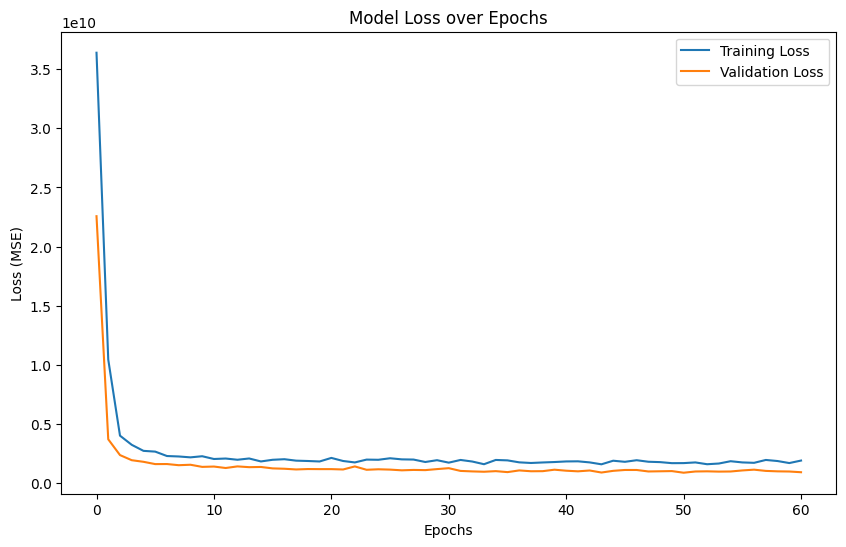

In [12]:
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
print(f"training_loss: {training_loss[-1]}")
print(f"validation_loss: {validation_loss[-1]}")

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.5f}")

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()
